Joshua Izaac, Jingbo Wang, Computational Quantum Mechanics, Springer 2019   
Section 8.3 Discretised Fourier transfrom 
Example 8.6 Discretised Fourier transfrom, p. 315

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
def func(x):
    y = np.sin(4*x)
    return y

In [3]:
# define the properties
N = 201
a = (N - 1)/2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)

# define the x-grid and discretised wavefunction
x = np.arange(-halfL, halfL+dx, dx) # 1D array, x.shape: (201,)

psi = np.exp(-(x**2)/2)*np.sin(4*x)
#psi = np.sin(4*x)           # 1D array, psi.shape: (201,)
#psi = func(x)

# define the k-grid
dk = 2*np.pi / (N*dx)
kmax = np.pi / dx
k = np.arange(-kmax, kmax, dk)  # 1D array, k.shape: (202,)

time_start = time.perf_counter()
# the 2-dimensional Fourier matrix using broadcasting
n = np.arange(N).reshape((-1, 1))   # 2D array, change with rows, n.shape(201,1)
m = np.arange(N).reshape((1, -1))   # 2D array, change with columns, m.shape(1,201)
W = np.exp(-2j*np.pi*(m-a)*(n-a)/N)  # numpy array broarcasting, W is a 2D array, W.shape(201,201)

# perform the discretised Fourier algorithm
# psi is indexed by n
psi_dft = psi.reshape(-1, 1)      # 2D array, psi_dft.shape(201,1)
# sum over n axis
phi = np.sum(psi_dft * W, axis=0)*dk/np.sqrt(2*np.pi) # 1D array, phi.shape(201,)
time_elapsed = time.perf_counter() - time_start
print(time_elapsed)
phi = np.abs(phi)

0.0054104000000005925


In [4]:
(psi_dft * W).shape

(201, 201)

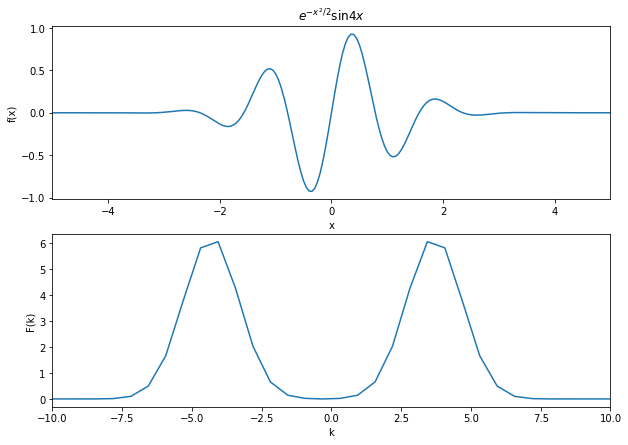

In [5]:
fig, ax = plt.subplots(2,1,figsize=(10,7))
ax[0].set_title('$e^{-x^2/2}\sin4x$')
ax[0].plot(x,psi)
ax[0].set_xlim(-halfL,halfL)
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[1].plot(k[0:len(x)],np.abs(phi))
ax[1].set_xlim(-10,10)
ax[1].set_xlabel('k')
ax[1].set_ylabel('F(k)')
fig.savefig('approx_fourier_example8_2.png')

**Compare with `scipy.fftpack`**

In [8]:
from scipy import fftpack

In [9]:
psi = func(x)

time_start = time.perf_counter()
G = fftpack.fft(psi)  # FFT of g
time_elapsed_fftpack = time.perf_counter() - time_start
print(time_elapsed_fftpack)

f = fftpack.fftfreq(psi.size, d=dx)  # FFT frequenies
f = fftpack.fftshift(f)  # shift freqs from min to max
G = fftpack.fftshift(G)  # shift G order to match f

0.02558439999999962


-0.31259628393945915


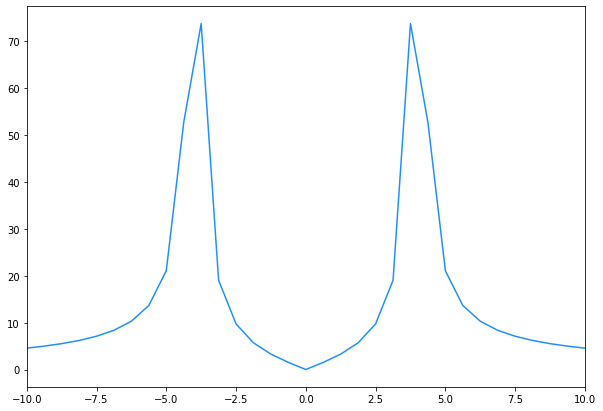

In [10]:
# to plot psi vs. k, you need to convert f to k: k = 2*np.pi*f
k_fftpack = 2*np.pi*f
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(k_fftpack, np.abs(G), color='dodgerblue', label='power')
ax.set_xlim(-10,10) 
print(k[np.argmax(abs(phi))] - k_fftpack[np.argmax(abs(G))])

**Inverse discrete Fourier transform**

In [6]:
# define the properties
N = 201
a = (N -1)/2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)

# define the x-grid and discretised wavefunction
x = np.arange(-halfL, halfL+dx, dx)
# psi = np.exp(-(x**2)/2)*np.sin(4*x)
psi = func(x)

# define the k-grid
dk = 2*np.pi / (N*dx)
kmax = np.pi / dx
k = np.arange(-kmax, kmax-dk, dk)

# the 2-dimensional Fourier matrix using broadcasting
n = np.arange(N).reshape((-1, 1))
m = np.arange(N).reshape((1, -1))
W = np.exp(2j*np.pi*(m-a)*(n-a)/N)

# perform the discretised Fourier algorithm
# psi is indexed by n
psi = psi.reshape(-1, 1)
# sum over n axis
phi = np.sum(psi * W, axis=0)*dk/np.sqrt(2*np.pi)

# perform the discretised inverse Fourier algorithm
phi = phi.reshape(-1,1)
W = np.conjugate(W)
psi_inverse_dft = np.sum(phi * W, axis=0)*dx/np.sqrt(2*np.pi)

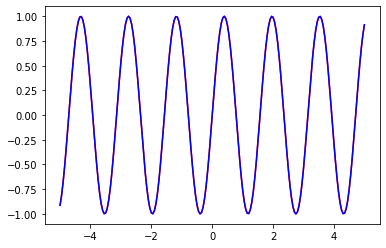

In [7]:
plt.plot(x,psi[:,0], 'r', x,np.real(psi_inverse_dft),'b')